In [1]:
import fitsio as ft
import numpy  as np
import matplotlib.pyplot as plt
import healpy as hp
from glob import glob

In [2]:
from nnbar import NNBAR

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


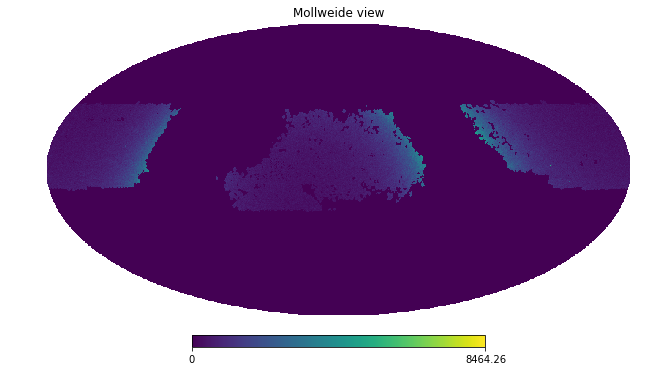

In [3]:
d = ft.read('/Volumes/TimeMachine/data/DR7/eBOSS.ELG.NGC.DR7.table.fits')
ms = hp.read_map('/Volumes/TimeMachine/data/DR7/mask.cut.hp.256.fits', verbose=False).astype('bool')
fr = hp.read_map('/Volumes/TimeMachine/data/DR7/frac.hp.256.fits')
gl = hp.read_map('/Volumes/TimeMachine/data/DR7/eBOSS.ELG.NGC.DR7.cut.hp256.fits')
nstar = np.zeros(12*256**2)
nstar[d['hpind']] = d['features'][:, 2]
hp.mollview(nstar)
plt.show()

In [9]:
fr[ms].sum()

179593.875

In [4]:
nnbar = NNBAR(gl, fr, ms, nstar, nbins=20)

0 8980.3125 40
1 8979.8125 40
2 8980.25 40
3 8980.5 40
4 8980.4375 40
5 8979.75 40
6 8980.5 40
7 8980.3125 40
8 8979.8125 40
9 8979.75 40
10 8980.625 40
11 8980.4375 40
12 8980.3125 40
13 8980.25 40
14 8980.625 40
15 8980.375 40
16 8979.8125 40
17 8980.125 40
18 8980.6875 40
19 8969.1875 40
min sys : 0.00  max sys : 5966.92
num of pts : 186349, num of bins : 20


In [6]:
nnbar.sysl[-1]

[1.0,
 0.9375,
 1.0,
 0.75,
 0.75,
 0.9375,
 0.8125,
 0.8125,
 0.9375,
 1.0,
 1.0,
 1.0,
 1.0,
 0.875,
 1.0,
 0.25,
 1.0,
 0.875,
 1.0,
 1.0,
 0.8125,
 1.0,
 0.375,
 1.0,
 0.9375,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8125,
 1.0,
 1.0,
 0.75,
 0.8125,
 0.9375,
 1.0,
 0.9375,
 1.0,
 0.75,
 0.9375,
 0.8125,
 1.0,
 0.375,
 0.9375,
 0.8125,
 1.0,
 1.0,
 0.9375,
 0.6875,
 0.25,
 1.0,
 1.0,
 0.9375,
 0.6875,
 1.0,
 1.0,
 0.8125,
 0.75,
 1.0,
 1.0,
 0.9375,
 1.0,
 0.9375,
 1.0,
 0.875,
 0.9375,
 0.9375,
 0.375,
 0.8125,
 1.0,
 0.875,
 0.5625,
 0.6875,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9375,
 0.6875,
 0.9375,
 1.0,
 1.0,
 0.75,
 0.9375,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9375,
 0.9375,
 1.0,
 1.0,
 1.0,
 0.8125,
 0.9375,
 0.875,
 1.0,
 1.0,
 0.9375,
 0.9375,
 0.875,
 1.0,
 0.9375,
 1.0,
 0.75,
 1.0,
 1.0,
 1.0,
 0.9375,
 0.8125,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9375,
 1.0,
 1.0,
 0.9375,
 1.0,
 1.0,
 1.0,
 1.0,
 

In [8]:
nnbar.bins.size

21

In [7]:
plt.plot(np.arange(nnbar.datas['ss'].size), nnbar.datas['ss'])

AttributeError: 'NNBAR' object has no attribute 'datas'

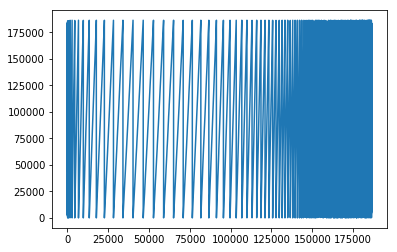

In [16]:
plt.plot(np.arange(nnbar.datas['ss'].size), nnbar.datas['rid'])

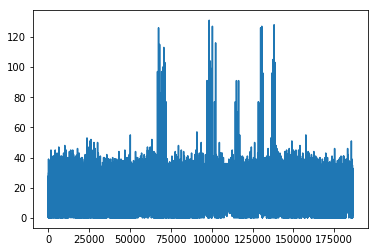

In [15]:
plt.plot(np.arange(nnbar.datas['ss'].size), nnbar.datat['gs'])

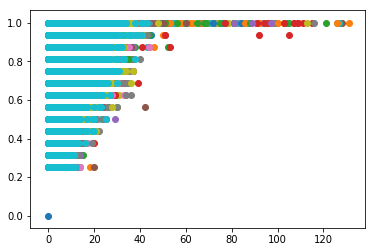

In [11]:
for i in range(0, 42, 2):
    plt.scatter(nnbar.sysl[i], nnbar.sysl[i+1])
plt.show()

In [5]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))

In [10]:
histedges_equalN(d['features'][:,0], 2)

array([0.00638683, 0.03911496, 0.55357385])

In [13]:
(d['features'][:,0] < 0.03911496).sum(), (d['features'][:,0] > 0.03911496).sum()

(93629, 93628)

In [14]:
import matplotlib.pyplot as plt

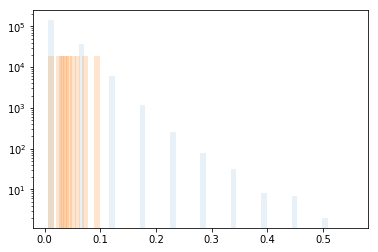

In [21]:
plt.hist(d['features'][:,0], bins=10, alpha=0.1, width=0.01)
plt.hist(d['features'][:,0], histedges_equalN(d['features'][:,0], 10), alpha=0.2, width=0.01)
plt.yscale('log')
plt.show()

In [19]:
histedges_equalN(d['features'][:,0], 10)

array([0.00638683, 0.0205446 , 0.02500112, 0.0291909 , 0.03376749,
       0.03911496, 0.04562581, 0.05425634, 0.06717074, 0.08915288,
       0.55357385])

In [27]:
20 // 2

10

In [31]:
ls /Volumes/TimeMachine/data/DR7/results/regression/nn_ab/

batchsize_validation.pdf     nn-rmse.npy
learningrate_validation.pdf  nn-rmse.pdf
nepochs_validation.pdf       nn-weights.hp256.fits
nlayers_validation.pdf       nn-weights256.fits
nn-log.txt                   scales_validation.pdf


In [32]:
import healpy as hp

In [35]:
nnw = hp.read_map('/Volumes/TimeMachine/data/DR7/results/regression/nn_ab/nn-weights.hp256.fits')
nnW = ft.read('/Volumes/TimeMachine/data/DR7/results/regression/nn_ab/nn-weights256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [38]:
np.mean(nnW['weight'], axis=1), nnw[nnW['hpind']]

(array([1.07301326, 0.96285703, 0.98738675, ..., 1.0264166 , 1.09365857,
        1.0236702 ]),
 array([1.07301326, 0.96285703, 0.98738675, ..., 1.0264166 , 1.09365857,
        1.0236702 ]))

In [44]:
for i in range(10):print((nnW['weight'][:,i]<0).sum())

206
263
250
171
181
223
245
186
224
238


In [45]:
(np.median(nnW['weight'], axis=1)<0).sum()

108

In [57]:
nnmap = np.zeros_like(nnw)*np.nan

In [58]:
nnmap[nnW['hpind']] = np.median(nnW['weight'], axis=1)

/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/projaxes.py:1054: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


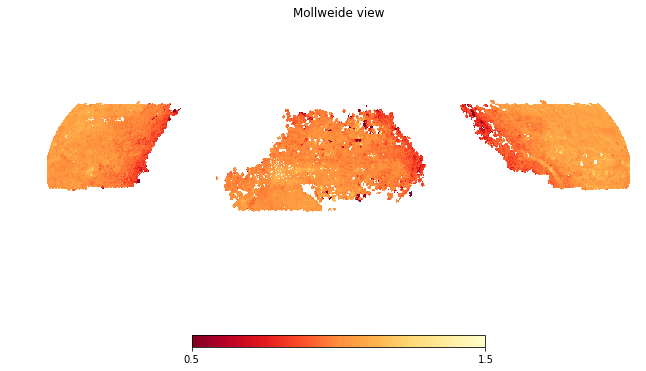

In [60]:
cm = plt.cm.YlOrRd_r
cm.set_under('w')
hp.mollview(nnmap, min=0.5, max=1.5, cmap=cm)
plt.show()

/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


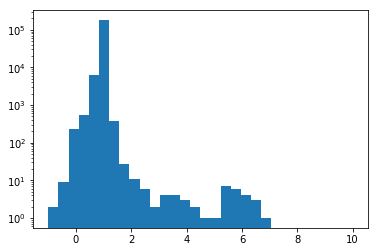

In [64]:
plt.hist(nnmap, range=(-1, 10), bins=30)
plt.yscale('log')

In [65]:
hp.write_map('/Volumes/TimeMachine/data/DR7/results/regression/nn_ab/nn-weights.hp256.fits',
             nnmap, fits_IDL=False, dtype=np.float64, overwrite=True)

In [66]:
from glob import glob

In [69]:
weights = glob('/Volumes/TimeMachine/data/DR7/results/regression/*/*weights.hp256.fits')
weights

['/Volumes/TimeMachine/data/DR7/results/regression/mult_all/lin-weights.hp256.fits',
 '/Volumes/TimeMachine/data/DR7/results/regression/mult_all/quad-weights.hp256.fits',
 '/Volumes/TimeMachine/data/DR7/results/regression/nn_ab/nn-weights.hp256.fits']

In [70]:
mask = hp.read_map('/Volumes/TimeMachine/data/DR7/mask.hp.256.fits').astype('bool')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [71]:
mask.sum()

187257

In [72]:
mask.sum()
for n in weights:
    wi = hp.read_map(n, verbose=False)
    maski = (wi > 0.5) & (wi < 2.0)
    mask &= maski
    print(mask.sum(), maski.sum())

187251 187251
187108 187114
186349 186367


/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


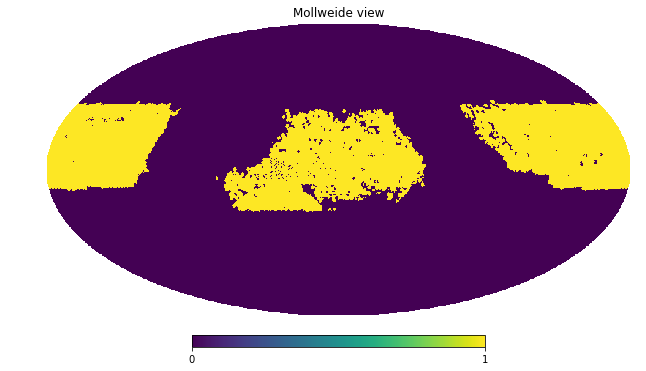

In [73]:
hp.mollview(mask)

In [74]:
hp.write_map('/Volumes/TimeMachine/data/DR7/mask.cut.hp.256.fits', mask)

In [75]:
NNw = hp.read_map('/Volumes/TimeMachine/data/DR7/results/regression/nn_ab/nn-weights.hp256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


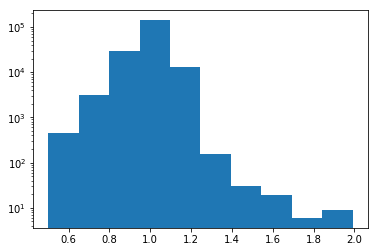

In [77]:
plt.hist(NNw[mask])
plt.yscale('log')

In [78]:
ls /Volumes/TimeMachine/data/DR7/

7.1/                              eBOSS.ELG.NGC.DR7.table.fits
DR7meta.h5                        frac.hp.256.fits
ccds-annotated-dr7.fits.gz        mask.cut.hp.256.fits
eBOSS.ELG.NGC.DR7.cut.fits        mask.hp.256.fits
eBOSS.ELG.NGC.DR7.cut.hp256.fits  results/
eBOSS.ELG.NGC.DR7.fits            sysmaps/
eBOSS.ELG.NGC.DR7.table.5.r.npy


In [79]:
weights

['/Volumes/TimeMachine/data/DR7/results/regression/mult_all/lin-weights.hp256.fits',
 '/Volumes/TimeMachine/data/DR7/results/regression/mult_all/quad-weights.hp256.fits',
 '/Volumes/TimeMachine/data/DR7/results/regression/nn_ab/nn-weights.hp256.fits']

In [20]:
mask = hp.read_map('/Volumes/TimeMachine/data/mocks/mask.hp.256.fits').astype('bool')
maps = glob('/Volumes/TimeMachine/data/mocks/3dbox/*/cp2p/cp2p_mask_*.hp.256.fits')
mask_neg = np.zeros(12*256*256, '?')
for n in maps:
    #print(n.split('/')[-1])
    mapi = hp.read_map(n, verbose=False).astype('bool')
    mask_neg |= mapi
    
noneg = (mask & (~mask_neg))
print('original mask: ', mask.sum(), 'after removing negative pixels :', noneg.sum())
hp.write_map('/Volumes/TimeMachine/data/mocks/mask.cut.hp.256.fits', noneg, dtype=np.float64, overwrite=True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
original mask:  89672 after removing negative pixels : 86875


In [23]:
ngal_c = hp.read_map('/Volumes/TimeMachine/data/mocks/3dbox/001/cp2p/cp2p_001.hp.256.fits')
ngal_u = hp.read_map('/Volumes/TimeMachine/data/mocks/3dbox/001/001.hp.256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [13]:
thph = hp.pix2ang(256, np.argwhere(noneg).flatten())

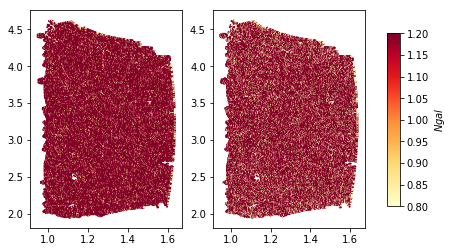

In [14]:
fig, ax= plt.subplots(ncols=2)
kw = dict(vmin=0.8, vmax=1.2 , cmap=plt.cm.YlOrRd)
map1 = ax[1].scatter(*thph,1.,  c=2*ngal_c[noneg]/np.mean(ngal_u[noneg]),**kw)
map2 = ax[0].scatter(*thph, 1., c=2*ngal_u[noneg]/np.mean(ngal_u[noneg]), **kw)
cax = plt.axes([.95, 0.2, 0.03, 0.6])
#fig.colorbar(map1, cax=cax)
fig.colorbar(map1, cax=cax, label=r'$Ngal$', shrink=0.7)


In [24]:
for ngali in [ngal_u, ngal_c]:
    print(np.mean(ngali[noneg]), np.std(ngali[noneg], ddof=1))

6.883372661870504 2.8369978668145714
7.05551654676259 4.2489809832569225


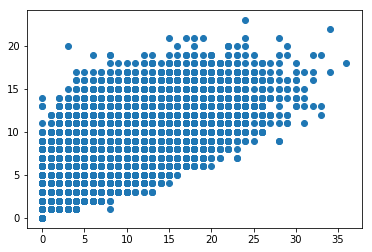

In [25]:
plt.scatter(ngal_c[noneg], ngal_u[noneg])

In [26]:
ls /Volumes/TimeMachine/data/mocks/

3dbox/                mask.cut.hp.256.fits  mocks.DR7.table.fits
fftlog.out            mask.hp.256.fits      randoms.h5
fracgood.hp256.fits   mask_ngc.ply          randoms.hp256.fits
